Sparsity in big data analytics can exist in many objects:
- Solution vector 
    - (especially in optimization / norm minimization)
    - For example, in a linear regression problem, the solution vector could represent the coefficients of the regression equation. If most of the coefficients are zeros, the solution vector is sparse, indicating that only a few features have significant impact on the output.
- Input data
    - In a movie recommendation system, the input data could be a user-item interaction matrix where rows represent users and columns represent movies. If most users have only rated a few movies and left the rest unrated, the input data is sparse.
- Output data
    - In natural language processing, generating a sparse output could refer to text summarization. Given a long article, a text summarization model might generate a summary that contains only a fraction of the words from the original article, making the output sparse compared to the input.
- Intermediate data representations 
    -  In image processing, during the intermediate stages of feature extraction using techniques like edge detection or corner detection, the resulting representations can be sparse. For example, in edge detection, only the edges of objects in an image are represented, ignoring the non-edge pixels, leading to a sparse intermediate data representation.

## 1. Solution vectors and sparsity

This block shows L1 norm for $\underset{x}{argmin} |Ax = b|_1$ problem provide a sparse solution. 
- L1 norm is preferred when sparsity is concerned, when we are selecting features, we want a robust solution to outliners. 
- L2 norm is preferred when data fitting, colinearity handling (which means handling highly correlated features), and unique solutions. 

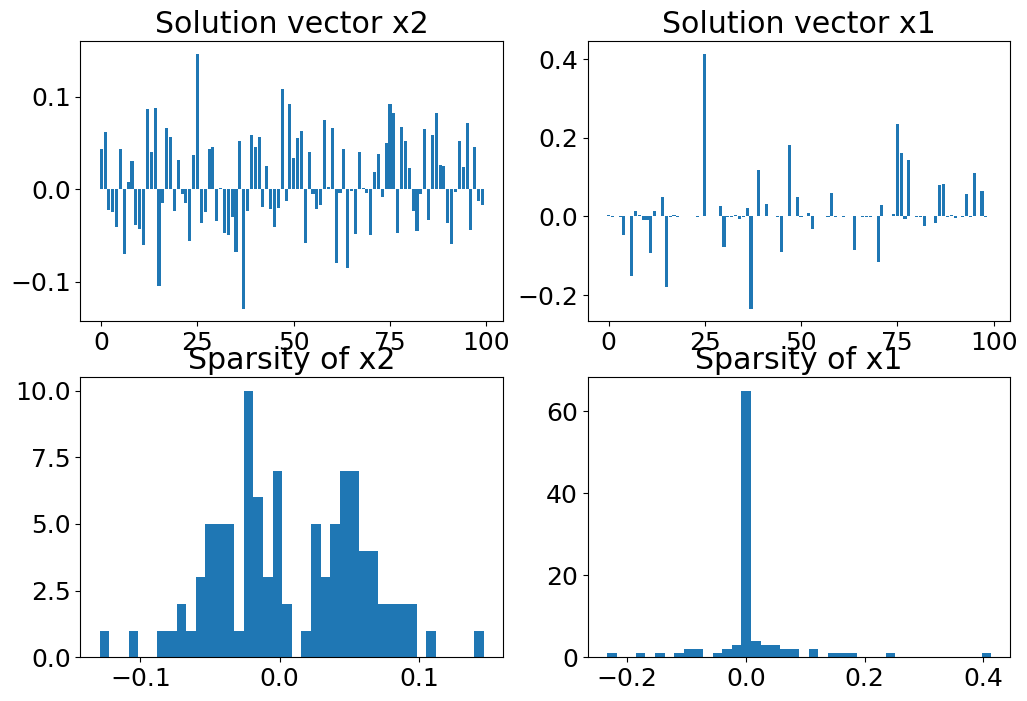

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import fmin
from matplotlib import rcParams
rcParams.update({'font.size': 18})

# Underdetermined
# n < m making the system underdetermined. 
n = 20
m = 100
A = np.random.rand(n,m)
b = np.random.rand(n)

# Two objective functions 

def two_norm(x):
    return np.linalg.norm(x,ord=2)

def one_norm(x):
    return np.linalg.norm(x,ord=1)

# Set up an underdetermined system of equations, Ax - b, where A is n by m matrix, b is a vecto rof length n. 
constr = ({'type': 'eq', 'fun': lambda x:  A @ x - b})
x0 = np.random.rand(m)

# Perform optimization - uses the `minimize` function from `scipy.optimize` to find the `x` that minimize the objective function while satisfying the constraints. 
# SLSQP: Sequential Least Squares Programming
res = minimize(two_norm, x0, method='SLSQP',constraints=constr)
x2 = res.x # x2: solution vector (x, for argmin x |Ax = b|_2`)

res = minimize(one_norm, x0, method='SLSQP',constraints=constr)
x1 = res.x # x1: solution vector (x, for argmin x |Ax = b|_1`)

plt.rcParams['figure.figsize'] = [12, 8]
fig,axs = plt.subplots(2,2)

# reshaping. 
# without reshaping we need to access the subplots using two indices. 
axs = axs.reshape(-1)

"""
top 2 plots are bar plots of `x2` and `x1`, which shows the values of the solution vectors. 
x-axis has been set as `range(m)`, and y-axis has been set as `x2` and `x1` (the value of solution vectors).

Syntax: `.bar(x = range(m), height = x2)`
"""
axs[0].bar(range(m),x2)
axs[0].set_title('Solution vector x2')
axs[1].bar(range(m),x1)
axs[1].set_title('Solution vector x1')

"""
The bottom 2 plots are histograms of `x2` and `x1`, which shows the distribution of the values of the solution vectors.
We can see that, the solution of L1 norm is more sparse than the solution of L2 norm. 

Syntax: `plt.hist(x = bins[:-1], bins = 40)`
"""
axs[2].hist(x2,40)
axs[2].set_title('Sparsity of x2')
axs[3].hist(x1,40)
axs[3].set_title('Sparsity of x1')

plt.show()